# The Spark Foundation

# Name : Priya Keshav Patil

## Data Science and Business Analytics

### Task 1: Prediction using Supervised ML

#### This Task is to predict the percentage of a student based on the no. of study hours. This is a simple linear regression task as it involves just two variables.

In [14]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
df=pd.read_csv("dataset.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploring the dataset

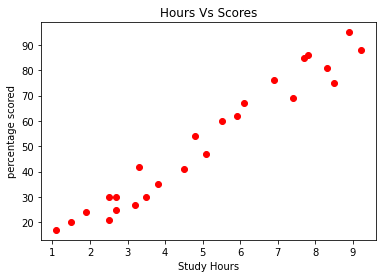

In [12]:
plt.scatter(df['Hours'],df['Scores'],color="red",marker="o")
plt.title("Hours Vs Scores")
plt.xlabel("Study Hours")
plt.ylabel("percentage scored")
plt.show()

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'plotting the regression line')

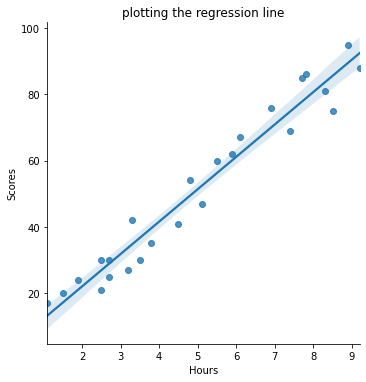

In [15]:
sns.lmplot(x="Hours",y="Scores",data=df)
plt.title("plotting the regression line")

##### From the graph above, we can say that with the increase of Study Hours(x) there is an increase in the Scores obtained(y)

### Extracting the independent and dependent variable

In [18]:
x=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

### Splitting dataset into training and testing set

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

### Training the Simple Linear Regression Model on the Training set

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Predicting the Test set results

In [22]:
y_pred=regressor.predict(x_test)
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [24]:
# comparison between actual and predicted Score
df1=pd.DataFrame({'Actual': y_test, 'predicted':y_pred})
df1

,Actual,predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


### Visualizing the Training set results

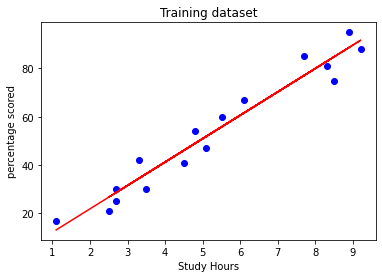

In [25]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title("Training dataset")
plt.xlabel("Study Hours")
plt.ylabel("percentage scored")
plt.show()

### Visualizing the Test set results

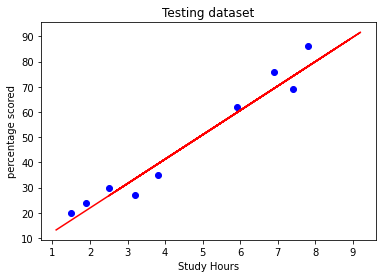

In [26]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title("Testing dataset")
plt.xlabel("Study Hours")
plt.ylabel("percentage scored")
plt.show()

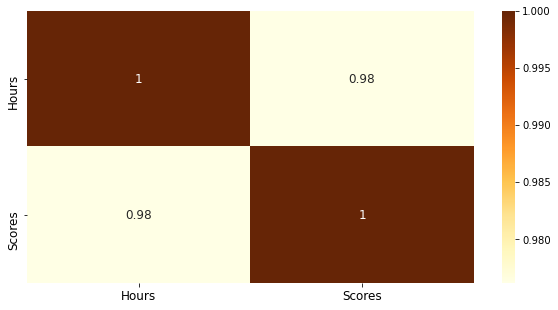

In [27]:
# checking for the correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr",annot_kws={'fontsize':12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Visualizing the Comparison between actual and predicted scores

Text(0, 0.5, 'Predicted Score')

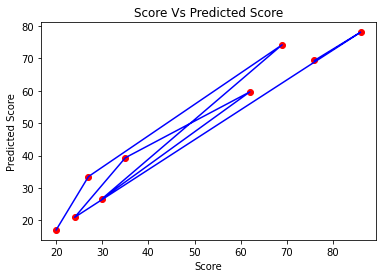

In [32]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred,c='b')
plt.title("Score Vs Predicted Score")
plt.xlabel("Score")
plt.ylabel("Predicted Score")

### What will be predicted score if a student studies for 9.25 hrs/day?

### prediction through our model

In [33]:
Hours=np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours:",format(Hours))
print("predicted Score:",format(predict[0]))

No of Hours: [[9.25]]
predicted Score: 92.14523314523314


### Checking accuracy of our model

In [34]:
print("train:",regressor.score(x_train,y_train)*100)
print("test:",regressor.score(x_test,y_test)*100)

train: 95.01107277744313
test: 95.5570080138813


## Finding mean absolute error, r^2 score error and mean squared error

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Mean absolute error:",metrics.mean_absolute_error(y_test,regressor.predict(x_test)))
print("r^2 score error:",r2_score(y_test,regressor.predict(x_test)))
print("Mean square error:",mean_squared_error(y_test,regressor.predict(x_test)))

Mean absolute error: 4.691397441397438
r^2 score error: 0.955570080138813
Mean square error: 25.463280738222547


## Mean absolute error: 4.69137441397438 which is quite accurate model for predicting the result